# Semantic Link "All-In-One" sample

Find the latest version of this sample at [Fabric Samples](https://github.com/microsoft/fabric-samples) 

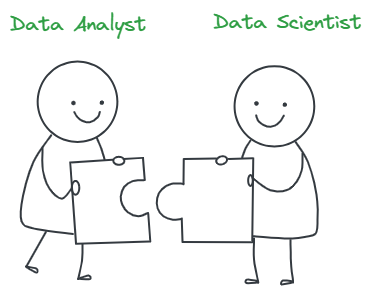

Semantic link is a feature that allows you to establish a connection between semantic models and Synapse Data Science in Microsoft Fabric. Use of semantic link is **only** supported in Microsoft Fabric.

The primary goals of semantic link are to: 
- facilitate data connectivity, 
- enable the propagation of semantic information, 
- seamlessly integrate with established tools used by data scientists, such as notebooks. 

Semantic link helps you to preserve domain knowledge about data semantics in a standardized way that can speed up data analysis and reduce errors.

You can access [Semantic Link documentation here](https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview). You can also find additional Semantic Link samples on the **[Fabric Samples](https://github.com/microsoft/fabric-samples)** repository.

### Table of contents

- Setup the sample
- Use Semantic Link for data exploration
- Use Semantic Link for data quality
- Data augmentation
- Semantic link with AI
- Fabric Development
 

### Prerequisites

* A [Microsoft Fabric subscription](https://learn.microsoft.com/fabric/enterprise/licenses). Or sign up for a free [Microsoft Fabric (Preview) trial](https://learn.microsoft.com/fabric/get-started/fabric-trial).
* Sign in to [Microsoft Fabric](https://fabric.microsoft.com/).
* If you want to run the LLM samples section, you will need at least an F64 Capacity.

## 🏗️ Setup the sample

All the samples in this notebook are based on the **Retail Analysis Sample** report and semantic model. This semantic model embeds it's own data and does not use any Lakehouse or Warehouse. 

You are encouraged to adapt these samples and try them on your own datasets 😊.


Most of the following samples needs to have one semantic model in the current workspace. Here are few steps to use a demo semantic model.

1. Download the _[Retail Analysis Sample.pbix](https://download.microsoft.com/download/9/6/D/96DDC2FF-2568-491D-AAFA-AFDD6F763AE3/Retail%20Analysis%20Sample%20PBIX.pbix)_ dataset.
1. Go to the Power BI experience in Microsoft Fabric.
1. Select **Workspaces** from the left navigation pane to find and select your workspace. This workspace becomes your current workspace. Note: you may want to create a dedicated workspace for this sample.
1. Click on **Upload** and then **Browser** button
1. Upload the *Retail Analysis Sample.pbix* file you just downloaded.
1. Go to the Data Science experience in Microsoft Fabric.
1. Open your notebook. You have two options:
    a. [Import this notebook into your workspace](https://learn.microsoft.com/en-us/fabric/data-engineering/how-to-use-notebook#import-existing-notebooks). You can import from the Data Science homepage.
    a. Alternatively, you can create [a new notebook](https://learn.microsoft.com/fabric/data-engineering/how-to-use-notebook#create-notebooks) to copy/paste code into cells.
<!-- * In the Lakehouse explorer section of your notebook, add a new or existing lakehouse to your notebook. For more information on how to add a lakehouse, see [Attach a lakehouse to your notebook](https://learn.microsoft.com/en-us/fabric/data-science/tutorial-data-science-prepare-system#attach-a-lakehouse-to-the-notebooks). -->


Now, you will need to load the semantic library in the current session. One of the way to achieve this is to create a personalized environment and [add the library](https://learn.microsoft.com/fabric/data-engineering/environment-manage-library). As it may take some time to spin-up a new environment, we will just include it with the next cell.

In [2]:
# install libraries
%pip install semantic-link

# Load %%dax cell magic
%load_ext sempy

# Import semantic link functions
import sempy.fabric as fabric

my_dataset_name = "Retail Analysis Sample PBIX"

StatementMeta(, 16177905-8308-4b49-8848-5e3fe0458ba8, 9, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 147.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 176.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 107.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 165.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 193.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



You'll notice that we are installing quite a few libraries in there. Each call to `pip install` will restart the kernel. To avoid this, we are loading _all_ the libarires required for _all_ the samples. If you want to use only semantic link, you could include it with the following line.

```python
%pip install semantic-link
```

## 🔎 Use semantic link for data exploration

Semantic link allow you to explore your semantic models (formely know as datasets) and your data easily from the Notebook experience in Microsoft Fabric.

### Explore your semantic model

Semantic Link allows you to list your datasets, list tables - and their columns -, and of course measures.

In [5]:
df_datasets = fabric.list_datasets()
df_datasets

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 31, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,Retail Analysis Sample PBIX,2ca07534-0de3-4292-8188-ae22b160a160,2014-05-30 20:16:22,NaT


In [4]:
df_tables = fabric.list_tables(my_dataset_name)
df_tables

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 12, Finished, Available)

,Name,Description,Hidden,Data Category,Type
0,Store,,False,,Table
1,Sales,,True,,Table
2,Item,,False,,Table
3,Time,,False,Time,Table
4,District,,False,,Table


In [10]:
df_columns = fabric.list_tables(my_dataset_name, include_columns=True)
df_columns[df_columns["Name"] == "Sales"]

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 18, Finished, Available)

,Name,Description,Hidden,Data Category,Type,Column
1,Sales,,True,,Table,MonthID
1,Sales,,True,,Table,ItemID
1,Sales,,True,,Table,LocationID
1,Sales,,True,,Table,Sum_GrossMarginAmount
1,Sales,,True,,Table,Sum_Regular_Sales_Dollars
1,Sales,,True,,Table,Sum_Markdown_Sales_Dollars
1,Sales,,True,,Table,ScenarioID
1,Sales,,True,,Table,ReportingPeriodID
1,Sales,,True,,Table,Sum_Regular_Sales_Units
1,Sales,,True,,Table,Sum_Markdown_Sales_Units


In [8]:
df_measures = fabric.list_measures(my_dataset_name)
df_measures

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 34, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,Store,Average Selling Area Size,AVERAGE([SellingAreaSize]),Double,False,,,"#,0",,None,None
1,Store,New Stores,"CALCULATE(COUNTA([Store Type]), FILTER(ALL(Sto...",Int64,False,,,,,None,None
2,Store,New Stores Target,14,Int64,False,,,,,None,None
3,Store,Total Stores,COUNTA([StoreNumberName]),Int64,False,,,0,,None,None
4,Store,Open Store Count,COUNTA([OpenDate]),Int64,False,,,0,,None,None
5,Store,Count of OpenDate,COUNTA('Store'[OpenDate]),Int64,False,,,,,None,None
6,Sales,Regular_Sales_Dollars,SUM([Sum_Regular_Sales_Dollars]),Double,False,,,,,None,None
7,Sales,Markdown_Sales_Dollars,SUM([Sum_Markdown_Sales_Dollars]),Double,False,,,,,None,None
8,Sales,TotalSales,[Regular_Sales_Dollars]+[Markdown_Sales_Dollars],Double,False,,,,,None,None
9,Sales,TotalSalesLY,"CALCULATE([TotalSales], Sales[ScenarioID]=2)",Double,False,,,"\$#,0;(\$#,0);\$#,0",,None,None


### Query your semantic model

On top of exploring the _structure_ of your semantic model, you can query it in different ways.

#### Read table data with python

The most straightforward way to read a table is with the python method `fabric.read_table`. This method returns a `FabricDataFrame`. It subclass pandas' `DataFrame` and support all pandas operations. That means you can leverage well known libraries like _seaborn_ or _sci-kit learn_ are working out of the box. A `FabricDataFrame` also contains metadata to maintain semantic properties and lineage.

In [9]:
df_table = fabric.read_table(my_dataset_name, "Sales")
df_table.head(5)

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 35, Finished, Available)

,MonthID,ItemID,LocationID,Sum_GrossMarginAmount,Sum_Regular_Sales_Dollars,Sum_Markdown_Sales_Dollars,ScenarioID,ReportingPeriodID,Sum_Regular_Sales_Units,Sum_Markdown_Sales_Units
0,201408,256441,568,4.99,9.99,0.0,1,20140801,1.0,0.0
1,201408,289471,24,4.99,9.99,0.0,1,20140801,1.0,0.0
2,201408,289471,27,4.99,9.99,0.0,1,20140801,1.0,0.0
3,201408,292637,530,4.99,9.99,0.0,1,20140801,1.0,0.0
4,201408,292637,565,4.99,9.99,0.0,1,20140801,1.0,0.0


#### Query your model from Spark

If you are a Spark user, you can also leverage SparkSQL to query your semantic models. To do so, you need to "connect" Spark SQL and Fabric with the following code.

In [23]:
spark.conf.set("spark.sql.catalog.pbi", "com.microsoft.azure.synapse.ml.powerbi.PowerBICatalog")

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 48, Finished, Available)

Once this cell is executed, you can execute sql queries with `spark.sql` method.

In [27]:
df = spark.sql("SHOW TABLES FROM pbi")
display(df)

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 52, Finished, Available)

SynapseWidget(Synapse.DataFrame, d686e058-729d-4d2e-91b0-fa74fc0770a3)

In [29]:
df = spark.sql("SELECT * FROM pbi.`Retail Analysis Sample PBIX`.Sales")
display(df)

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 54, Finished, Available)

SynapseWidget(Synapse.DataFrame, f96c635f-f70d-4528-956e-2844e10e2703)

You can run Spark SQL queries directly by selecting the cell language.

In [30]:
%%sql
SELECT * FROM pbi.`Retail Analysis Sample PBIX`.Sales

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 55, Finished, Available)

<Spark SQL result set with 1000 rows and 10 fields>

In [35]:
%%sql

SELECT
    `MonthID`,
    `LocationID`,
    MAX(`Sum_GrossMarginAmount`)
FROM pbi.`Retail Analysis Sample PBIX`.Sales
WHERE `LocationID` in ('556','32')
GROUP BY
    `MonthID`,
    `LocationID`
ORDER BY     
    `MonthID`,
    `LocationID`

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 60, Finished, Available)

<Spark SQL result set with 16 rows and 3 fields>

#### Display Semantic model data in Notebooks

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 39, Finished, Available)

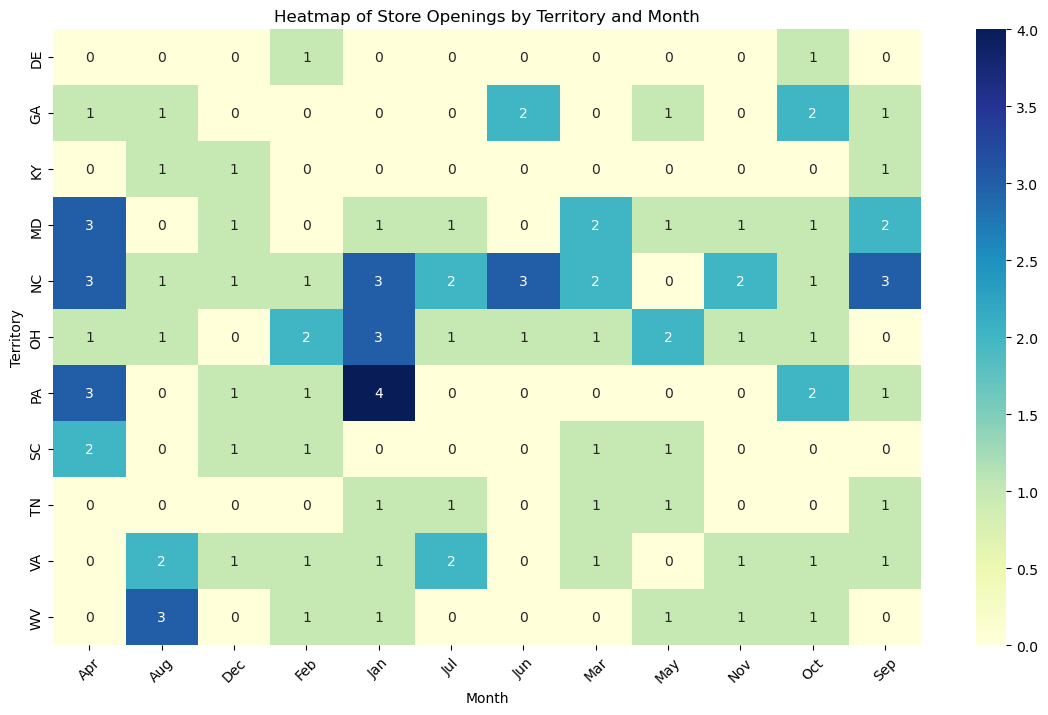

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Semantic Model
df_table = fabric.read_table(my_dataset_name, "Store")

# Create a pivot table for heatmap
heatmap_data = df_table.pivot_table(index='Territory', columns=pd.Grouper(key='Open Month'), aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Store Openings by Territory and Month')
plt.xlabel('Month')
plt.ylabel('Territory')
plt.xticks(rotation=45)
plt.show()


In [18]:
from powerbiclient import QuickVisualize, get_dataset_config, Report
df_table = fabric.read_table(my_dataset_name, "Store")
PBI_visualize = QuickVisualize(get_dataset_config(df_table))

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 27, Finished, Available)

In [19]:
PBI_visualize

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 28, Finished, Available)

QuickVisualize()

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 29, Finished, Available)

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 30, Finished, Available)

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 31, Finished, Available)

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 32, Finished, Available)

### Evaluate measures

Measures are an integral part of a semantic model. You can evaluate measures from Python and use these values for data analysis, ML model training or export.

#### Evaluate a raw measure

In [10]:
fabric.evaluate_measure(my_dataset_name, measure="Average Selling Area Size")

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 36, Finished, Available)

,Average Selling Area Size
0,24326.923077


#### Evaluate a measure with `groupby_columns`

In [11]:
fabric.evaluate_measure(my_dataset_name, measure="Average Selling Area Size", groupby_columns=["Store[Chain]", "Store[DistrictName]"])

StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 37, Finished, Available)

,Chain,DistrictName,Average Selling Area Size
0,Fashions Direct,FD - District #1,43888.888889
1,Fashions Direct,FD - District #2,47777.777778
2,Fashions Direct,FD - District #3,50000.0
3,Fashions Direct,FD - District #4,50500.0
4,Lindseys,LI - District #1,10384.615385
5,Lindseys,LI - District #2,10909.090909
6,Lindseys,LI - District #3,10333.333333
7,Lindseys,LI - District #4,12500.0
8,Lindseys,LI - District #5,11785.714286


#### Bring DAX into your notebooks

If you want to execute DAX code on a regular basis and the result is not used from a python code, you can directly execute a DAX code from a cell. 

To do this, you will need to load the _DAX Magic cell_ extension. This is already done in the setup step of this notebook with the following code.

```
%load_ext sempy
```

Once this cell is executed, you can use any new cell by referencing the DAX magic cell extension, then followed by the name of the Semantic model you want to run the DAX query against.

```
%%dax "Retail Analysis Sample PBIX"
```

##### Execute DAX query in a cell

In [20]:
%%dax "Retail Analysis Sample PBIX"

EVALUATE
SUMMARIZECOLUMNS(
"Avg Selling Area Size",[Average Selling Area Size]
)


StatementMeta(, 869ac48d-16ea-4898-96ea-327ff3cb2641, 45, Finished, Available)

,[Avg Selling Area Size]
0,24326.923077


##### Query Dynamic Management Views

You can also use the DAX cell magic to query Dynamic Management Views (DMVs). These queries return information about model objects, server operations and server health. 

You can learn more about [DMVs in our documentation](https://learn.microsoft.com/en-us/analysis-services/instances/use-dynamic-management-views-dmvs-to-monitor-analysis-services?view=asallproducts-allversions).

In [ ]:
%%dax "Retail Analysis Sample PBIX"

SELECT * FROM $SYSTEM.discover_sessions

You can find more ways to evaluate measures with semantinc link in the [Power BI Measures tutorial](https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/semantic-link-samples/powerbi_measures_tutorial.ipynb) sample.

## ✅ Use semantic link for data quality

Data quality is certainly a concern at every step of your data pipeline. As semantic models represents business concepts, it may be relevant to ensure data quality bar is met at this level. It could be relevant - and quite easy - to test that values at the semantic level are within expected "business" bounds.

### Detect, plot and analyze functional dependencies

Semantic Link can help you find and evaluate functional dependencies within your semantic model, and detect violations of such dependencies.

In [30]:
from sempy.dependencies import plot_dependency_metadata

df_sales = fabric.read_table(my_dataset_name, "Store")
df_sales.head(5)

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 43, Finished, Available)

,LocationID,City Name,Territory,PostalCode,OpenDate,SellingAreaSize,DistrictName,Name,StoreNumberName,StoreNumber,City,Chain,DM,DM_Pic,DistrictID,Open Year,Store Type,Open Month No,Open Month
0,2,Weirton,WV,26032,2010-05-01,40000,FD - District #4,Weirton Fashions Direct,2 - Weirton Fashions Direct,2,"Weirton, WV",Fashions Direct,Andrew Ma,https://obvience-public.sharepoint.com/SiteAss...,4,2010,Same Store,5,May
1,3,Beckley,WV,25801,2008-02-01,40000,FD - District #2,Beckley Fashions Direct,3 - Beckley Fashions Direct,3,"Beckley, WV",Fashions Direct,Tina Lassila,https://obvience-public.sharepoint.com/SiteAss...,2,2008,Same Store,2,Feb
2,4,Fairmont,WV,26554,2006-10-01,15000,FD - District #1,Fairmont Fashions Direct,4 - Fairmont Fashions Direct,4,"Fairmont, WV",Fashions Direct,Valery Ushakov,https://obvience-public.sharepoint.com/SiteAss...,1,2006,Same Store,10,Oct
3,5,Uniontown,PA,15401,2008-10-01,55000,FD - District #4,Uniontown Fashions Direct,5 - Uniontown Fashions Direct,5,"Uniontown, PA",Fashions Direct,Andrew Ma,https://obvience-public.sharepoint.com/SiteAss...,4,2008,Same Store,10,Oct
4,6,Parkersburg,WV,26101,2007-08-01,60000,FD - District #2,Parkersburg Fashions Direct,6 - Parkersburg Fashions Direct,6,"Parkersburg, WV",Fashions Direct,Tina Lassila,https://obvience-public.sharepoint.com/SiteAss...,2,2007,Same Store,8,Aug


StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 44, Finished, Available)

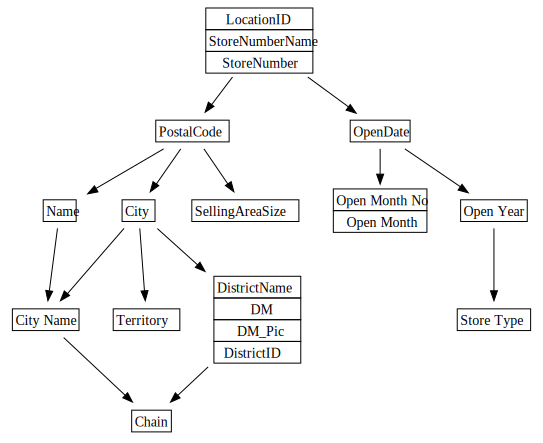

In [31]:
deps = df_sales.find_dependencies()
plot_dependency_metadata(deps)

In [35]:
df_sales.list_dependency_violations('Name', 'City Name')

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 48, Finished, Available)

No violations


,Name,City Name,count


If you want to learn more about data cleaning and functional dependencies, [check-out the related tutorial](https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/semantic-link-samples/data_cleaning_functional_dependencies_tutorial.ipynb)

### Perform data validation with Great Expectations

[Great Expectations](https://github.com/great-expectations/great_expectations) is a python library that help you surface issues quickly and clearly while also making it easier to collaborate with nontechnical stakeholders.

[See this tutorial](https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/semantic-link-samples/great_expectations_tutorial.ipynb) for an in-depth view on how to use Great Expectations to validate constrains on a dataset.

## ➕ Data Augmentation

### Augment your dataframe with measures

For the examples in this section to work, you need to link a Lakehouse to your current notebook session. 

1. On the _Explorer_ pane in the left, click on "Lakehouses"
1. Click on **Add Lakehouse**
1. In the dialog, select **New Lakehouse**
1. Give your lakehouse a name and validate.
1. If asked to reboot your current session, click **yes**
1. Go back on "Setup" step and re-run these steps
1. Come back here and continue.

In [ ]:
from sempy.fabric import FabricDataFrame

df = FabricDataFrame({
        "Sales Agent": ["Agent 1", "Agent 1", "Agent 2"],
        "Customer[Country/Region]": ["US", "GB", "US"],
        "Industry[Industry]": ["Services", "CPG", "Manufacturing"],
    }
)

joined_df = df.add_measure(["Total Revenue", "Total Budget"], dataset="Sales Dataset")

### Save a dataframe in the lakehouse

As a Data Engineer, you may have loaded data from one or several semantic models, done some data preparation task and even maybe trained an ML model. With Semantic link, you can now save back these data in the semantic model, right from Python.

In [3]:
from sempy.fabric import FabricDataFrame

df_forecast = FabricDataFrame({'ForecastedRevenue': [1, 2, 3]})

df_forecast.to_lakehouse_table("ForecastTable")

StatementMeta(, 16177905-8308-4b49-8848-5e3fe0458ba8, 11, Finished, Available)

## 🔮 Use Semantic Link with AI

### Train an ML Model from Semantic Table data

You can use data from a Semantic model to train a machine learning model. A sample of this will be published soon.

### Use Semantic table data with Azure AI Services in Microsoft Fabric

In [37]:
df_measures = fabric.list_measures("Retail Analysis Sample PBIX")
df_measures

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 50, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,Store,Average Selling Area Size,AVERAGE([SellingAreaSize]),Double,False,,,"#,0",,None,None
1,Store,New Stores,"CALCULATE(COUNTA([Store Type]), FILTER(ALL(Sto...",Int64,False,,,,,None,None
2,Store,New Stores Target,14,Int64,False,,,,,None,None
3,Store,Total Stores,COUNTA([StoreNumberName]),Int64,False,,,0,,None,None
4,Store,Open Store Count,COUNTA([OpenDate]),Int64,False,,,0,,None,None
5,Store,Count of OpenDate,COUNTA('Store'[OpenDate]),Int64,False,,,,,None,None
6,Sales,Regular_Sales_Dollars,SUM([Sum_Regular_Sales_Dollars]),Double,False,,,,,None,None
7,Sales,Markdown_Sales_Dollars,SUM([Sum_Markdown_Sales_Dollars]),Double,False,,,,,None,None
8,Sales,TotalSales,[Regular_Sales_Dollars]+[Markdown_Sales_Dollars],Double,False,,,,,None,None
9,Sales,TotalSalesLY,"CALCULATE([TotalSales], Sales[ScenarioID]=2)",Double,False,,,"\$#,0;(\$#,0);\$#,0",,None,None


In [41]:
def clean_data(df_measures):
    df_measures = df_measures.loc[:, ['Measure Name', 'Measure Expression']]
    df_measures['prompt'] = 'Generate a documentation that business users can understand for the DAX measure named """  ' + df_measures['Measure Name'] + ' """. The code is following between three quotes: """ ' + df_measures['Measure Expression'] + '""". Generate a documentation in three parts: Summary, Detailed explaination, Dependant columns.'
    return spark.createDataFrame(df_measures)

df_measures_clean = clean_data(df_measures.copy())
df_measures_clean.head()
df_with_prompts = df_measures_clean.head(5) # We are limiting the number of rows to make the OpenAI call quicker. You can remove this to run on all measures.

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 54, Finished, Available)

In [40]:
import synapse.ml.core
from synapse.ml.services import *
from pyspark.sql.functions import col, flatten, udf, lower, trim
from pyspark.sql.types import StringType

deployment_name = "text-davinci-003"
completion = (
    OpenAICompletion()
    .setDeploymentName(deployment_name)
    .setMaxTokens(200)
    .setPromptCol("prompt")
    .setErrorCol("error")
    .setOutputCol("classification")
)
completed_df = completion.transform(df_measures_clean)\
                .withColumn("documentation", trim(lower(col("classification.choices.text")[0])))\
                .cache()
display(completed_df)

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 53, Finished, Available)

SynapseWidget(Synapse.DataFrame, 09f4cd3c-569f-48a4-b3c1-b31fcba474ca)

## 👩‍💻 Fabric Developer / Data Engineer

There are several use cases where you might need a "Fabric Developer". Semantic Link gives you an easy way to create some items in a workspace, or explore settings and metadata about your Fabric items.

[This GitHub repository](https://github.com/m-kovalsky/Fabric) list great examples about Fabric Development with Semantic Link.

### Some ideas

In [ ]:
# List all applications
apps = fabric.list_apps()
apps

In [ ]:
# List all Fabric capacities
x = fabric.list_capacities()
x

In [43]:
# List all columns in a specific dataset and information about model performance
dfC = fabric.list_columns(my_dataset_name, extended=True)
dfC_filt = dfC[dfC['Is Resident']]
total_size_sum = dfC_filt['Total Size'].sum()
total_size_sum

dfC = fabric.list_columns(my_dataset_name, extended=True).sort_values(by='Temperature', ascending=False)
dfC

StatementMeta(, eee4dc1e-459d-480f-adfb-87662da8f477, 56, Finished, Available)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Modified Time,Column Cardinality,Total Size,Data Size,Dictionary Size,Hierarchy Size,Encoding,Is Resident,Temperature,Last Accessed
0,Store,RowNumber-2662979B-1795-4F74-8F37-6A1BA8059B61,,RowNumber,Int64,True,,None,,,...,2017-03-04 22:30:41,104,128,128,0,0,NaN,<NA>,<NA>,NaT
1,Store,LocationID,,Data,Int64,True,,LocationID,,,...,2017-03-04 22:30:42,104,3864,224,2760,880,Hash,True,<NA>,NaT
2,Store,City Name,,Data,String,True,,City Name,City,,...,2017-03-04 22:30:42,97,20942,224,19902,816,Hash,True,<NA>,NaT
3,Store,Territory,,Data,String,False,,Territory,StateOrProvince,,...,2017-03-04 22:30:42,11,17562,184,17250,128,Hash,True,<NA>,NaT
4,Store,PostalCode,,Data,String,False,,PostalCode,PostalCode,,...,2017-03-04 22:30:42,103,20244,224,19156,864,Hash,True,<NA>,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,LocalDateTable_2403841f-d1ed-4123-bf26-4ba8066...,MonthNo,,Calculated,Int64,True,,MONTH([Date]),MonthOfYear,,...,2017-03-20 22:50:24,12,2192,680,1368,144,Hash,True,<NA>,NaT
71,LocalDateTable_2403841f-d1ed-4123-bf26-4ba8066...,Month,,Calculated,String,True,,"FORMAT([Date], ""MMMM"")",Months,,...,2017-03-04 22:30:43,12,18188,680,17364,144,Hash,True,<NA>,NaT
72,LocalDateTable_2403841f-d1ed-4123-bf26-4ba8066...,QuarterNo,,Calculated,Int64,True,,INT(([MonthNo] + 2) / 3),QuarterOfYear,,...,2017-03-20 22:50:24,4,1552,136,1336,80,Hash,True,<NA>,NaT
73,LocalDateTable_2403841f-d1ed-4123-bf26-4ba8066...,Quarter,,Calculated,String,True,,"""Qtr "" & [QuarterNo]",Quarters,,...,2017-03-04 22:30:43,4,17392,136,17176,80,Hash,True,<NA>,NaT
